In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


### Set the location of the results data and where to save the figures
You can find the location of the results data on [line 36 of analyse_data.py](https://github.com/Jalink-lab/pde-screen-2021/blob/main/analyse_data.py#L36)

In [2]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [3]:
data1 = pd.read_csv(Path(WRITE_PATH,'2019','11','07','chemical','results','all_results.csv'))
data2 = pd.read_csv(Path(WRITE_PATH,'2020','01','07','chemical','results','all_results.csv'))
data3 = pd.read_csv(Path(WRITE_PATH,'2020','02','06','chemical','results','all_results.csv'))

In [4]:
#changing the names appearing on the plot
data1.condition = data1.condition.replace('1uM_Cilostamide', '1μM Cilostamide')
data2.condition = data2.condition.replace('100uM_IBMX','100μM IBMX')
data3.condition = data3.condition.replace('Double-KD_PDE3A&10A','Double-KD: PDE3A & 10A')
data3.condition = data3.condition.replace('100uM_IBMX_+_1uM_Cilostamide','1μM Cilo & 100μM IBMX')
data3.condition = data3.condition.replace('100uM_IBMX','100μM IBMX')
data3.condition = data3.condition.replace('1uM_Cilostamide','1μM Cilostamide')

In [5]:
# filter data based on the good fit and no dark frames present
fit_noerrors1 = data1[data1['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe1 = data1[data1['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data1 = pd.concat([fit_noerrors1,fit_hasdarkframe1])  # <<<<<<< We only look at the errorfree data!
fit_noerrors2 = data2[data2['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe2 = data2[data2['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data2 = pd.concat([fit_noerrors2,fit_hasdarkframe2])  # <<<<<<< We only look at the errorfree data!
fit_noerrors3 = data3[data3['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe3 = data3[data3['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data3 = pd.concat([fit_noerrors3,fit_hasdarkframe3])  # <<<<<<< We only look at the errorfree data!

errorfree_data = pd.concat([errorfree_data1,errorfree_data2,errorfree_data3])
errorfree_data.condition = errorfree_data.condition.replace('Untransfected_cells','Untransfected cells')
errorfree_data.condition = errorfree_data.condition.replace('RNAiMAX_reagent_only','RNAiMAX reagent only')

In [6]:
# change the order
conditions = errorfree_data.condition.unique()
conditions_new = conditions.copy()
conditions_new[22] = conditions[26]
conditions_new[23:27] = conditions[22:26]
reordered_data = pd.DataFrame()
for condition in conditions_new:
    reordered_data = pd.concat([reordered_data, errorfree_data[errorfree_data['condition']==condition]])
reordered_data.rename(columns={"breakdown_time(s)": "breakdown_time", "start tau(ns)": "start_tau"}, inplace=True)
reordered_data.condition.unique()

array(['PDE1A', 'PDE1B', 'PDE1C', 'PDE2A', 'PDE3A', 'PDE3B', 'PDE4A',
       'PDE4B', 'PDE4C', 'PDE4D', 'PDE5A', 'PDE6A', 'PDE6B', 'PDE6C',
       'PDE6D', 'PDE6G', 'PDE7A', 'PDE7B', 'PDE8A', 'PDE8B', 'PDE10A',
       'PDE11A', 'Double-KD: PDE3A & 10A', 'RNAiMAX reagent only',
       'Untransfected cells', '1μM Cilostamide', '100μM IBMX',
       '1μM Cilo & 100μM IBMX'], dtype=object)

In [7]:
reordered_data = reordered_data[reordered_data.breakdown_time < 600] # filter out the couple of clear outliers if needed
print('maximal breakdown time in s', round(np.max(reordered_data["breakdown_time"]),2))
print('median breakdown time in s', round(np.median(reordered_data["breakdown_time"]),2))
print("")
print('maximal baseline value in ns', round(np.max(reordered_data["start_tau"]),2))
print('median baseline value in ns', round(np.median(reordered_data["start_tau"]),2))
print("")

maximal breakdown time in s 581.15
median breakdown time in s 32.38

maximal baseline value in ns 2.77
median baseline value in ns 2.28



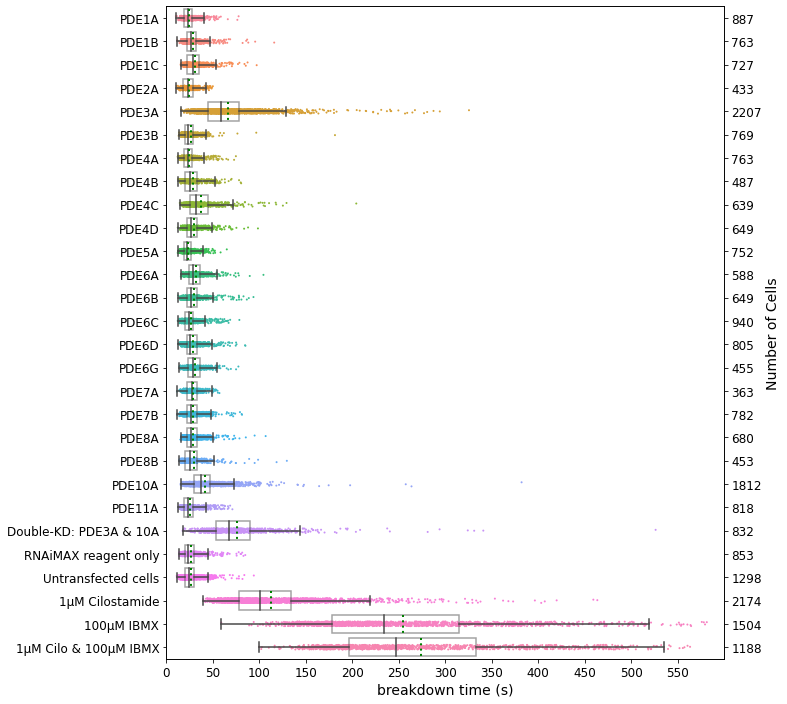

In [8]:
x_val=reordered_data['breakdown_time']

# get a figure (top level) and an axis (sub level) at the same time
# get a figure (top level) and an axis (sub level) at the same time
title = 'Figure 7'
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels


fig, ax = plt.subplots()
sns.stripplot(ax=ax, x=x_val, y="condition", data=reordered_data, size=2, zorder=0)
bbox_props = dict(facecolor="none", alpha=0.5, )
sns.boxplot(ax=ax, x=x_val, y="condition", boxprops=bbox_props,
            data=reordered_data, showmeans=True,
            meanprops={"linestyle":":", "linewidth":"2", "color":"green"}, meanline=True,
            showfliers=False, zorder=1)
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Number of Cells")
# generate ticks with the nr of cells
allconditions = reordered_data.condition.unique()
# yaxis runs from 0 to 1 if there would be 10 conditions they would be at 0.05 0.15 .. 0.85 0.95
ticks = [1 / (2 * (len(allconditions)))]
for i in range(0, len(allconditions) - 1):
    ticks.append(ticks[i] + 1 / (len(allconditions)))
ax2.set_yticks(ticks)
yticklabels = []
for condition in allconditions:
    yticklabels.append(str(sum(reordered_data['condition'] == condition)))
ax2.set_yticklabels(reversed(yticklabels))
ax.yaxis.set_label_text("") # we loose the y-axis title "condition"
fig.set_size_inches([16, 14])
#ax.set_title(title)
ax.xaxis.set_label_text('breakdown time (s)')
xaxislength = 600
plt.xlim(0, xaxislength)
plt.xticks(ticks=range(0, xaxislength, 50));
fig.set_size_inches([10, 12])
if SAVE_FIGURE[0]:
    SAVE_FIGURE[1].mkdir(parents=True, exist_ok=True)
    fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600, bbox_inches = 'tight')

In [9]:
print("Package versions used to generate this jupyter notebook:")
%watermark --iversions

Package versions used to generate this jupyter notebook:
numpy   1.19.2
seaborn 0.10.1
pandas  1.2.0

